In [170]:
##IMPORTING LIBRARIES


from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans



importing dataset

In [171]:
tx_data = pd.read_csv(r'C:\Users\user\Downloads\OnlineRetail.csv',encoding= 'unicode_escape')
tx_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


DATA WRANGLING

In [184]:
tx_data.sample(15)



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40787,539742,22301,COFFEE MUG CAT + BIRD DESIGN,1,2010-12-21 15:20:00,5.06,NaN,United Kingdom
445426,574839,23462,ROCOCO WALL MIRROR WHITE,1,2011-07-11 11:40:00,19.95,15493.0,United Kingdom
406735,571828,22306,SILVER MUG BONE CHINA TREE OF LIFE,12,2011-10-19 11:52:00,1.06,16440.0,United Kingdom
462796,576014,23265,SET OF 3 WOODEN TREE DECORATIONS,1,2011-11-13 14:29:00,1.25,17218.0,United Kingdom
139047,548260,90099,NECKLACE+BRACELET SET BLUE HIBISCUS,4,2011-03-30 11:18:00,2.55,15373.0,United Kingdom
346577,567190,23399,HOME SWEET HOME HANGING HEART,24,2011-09-19 09:14:00,0.85,18226.0,United Kingdom
437998,574302,22584,PACK OF 6 PANNETONE GIFT BOXES,6,2011-03-11 16:28:00,2.55,13914.0,United Kingdom
466757,576329,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,2,2011-11-14 15:22:00,2.46,NaN,United Kingdom
510372,579449,22197,POPCORN HOLDER,100,2011-11-29 13:57:00,0.72,17101.0,United Kingdom
136931,548006,85099B,JUMBO BAG RED RETROSPOT,20,2011-03-29 10:50:00,1.95,18226.0,United Kingdom


In [185]:
# converting invoice date to handle various input formats
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [174]:
tx_data['InvoiceDate'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_8576\3195331668.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  541909
unique                  23260
top       2011-10-31 14:41:00
freq                     1114
first     2010-01-12 08:26:00
last      2011-12-10 17:19:00
Name: InvoiceDate, dtype: object

In [175]:
#checking dataset
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [176]:
tx_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


customer id & description columns have null values



performing Exploratory data analysis (EDA)

In [177]:
# checking for null values
print('Number of missing values in the dataset:', tx_data.isnull().sum())
print('Percentage of missing values in the dataset:', tx_data.isnull().sum().sum()*100/(df.shape[0]*df.shape[1]))

Number of missing values in the dataset: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Percentage of missing values in the dataset: 3.812780721125867


In [178]:
# checking for duplicate values
tx_data.duplicated().sum()

5268

In [179]:
# getting the duplicated values
duplicates= tx_data[tx_data.duplicated()]
duplicates[:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-01-12 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-01-12 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-01-12 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-01-12 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-01-12 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-09-12 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-09-12 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-09-12 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-09-12 11:34:00,2.10,14446.0,United Kingdom


customer id column and invoice number column have duplicates

In [186]:
#Period of time when purchases was made
print(tx_data['InvoiceDate'].min())
print(tx_data['InvoiceDate'].max())

2010-01-12 08:26:00
2011-12-10 17:19:00


the time span across which our dataset lies is a little less than a year

In [187]:
tx_data[["StockCode", "Description","Country"]].value_counts()

StockCode  Description                         Country       
85123A     WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom    2204
85099B     JUMBO BAG RED RETROSPOT             United Kingdom    2001
22423      REGENCY CAKESTAND 3 TIER            United Kingdom    1859
47566      PARTY BUNTING                       United Kingdom    1634
20725      LUNCH BAG RED RETROSPOT             United Kingdom    1460
                                                                 ... 
22674      FRENCH TOILET SIGN BLUE METAL       Germany              1
22675      FRENCH KITCHEN SIGN BLUE METAL      Finland              1
                                               Poland               1
                                               Switzerland          1
m          Manual                              United Kingdom       1
Length: 20755, dtype: int64

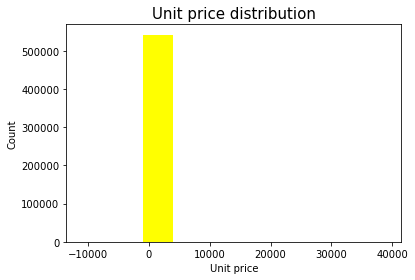

In [188]:
# Let's look at the price distribution of the products

plt.hist(data=tx_data, x='UnitPrice', color='yellow')
plt.xlabel('Unit price', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Unit price distribution", fontsize=15);

It seems that we have negative values and some outliers representing very expensive products. The negative values may be associated with cancelled or refunded orders. Let's remove them

Text(0.5, 1.0, 'Unit price distribution')

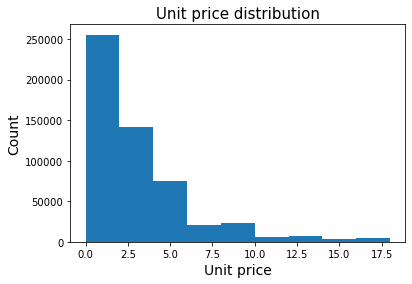

In [189]:
bins = np.arange(0, 20, 2)
plt.hist(data=tx_data, x='UnitPrice', bins=bins)
plt.xlabel('Unit price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Unit price distribution', fontsize=15)

In [190]:
#The price for most of the products is equal or less than 10euros

#L3et's look at the negative values in UnitPrice now

tx_data[tx_data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom


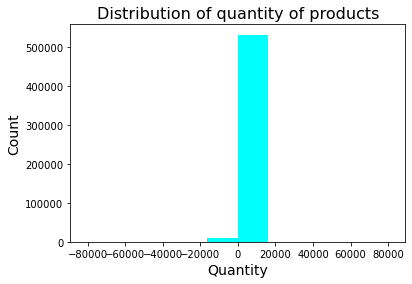

In [191]:
# Let's look at the quantity of the products

plt.hist(data=tx_data, x='Quantity', color='cyan')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Distribution of quantity of products", fontsize=16);

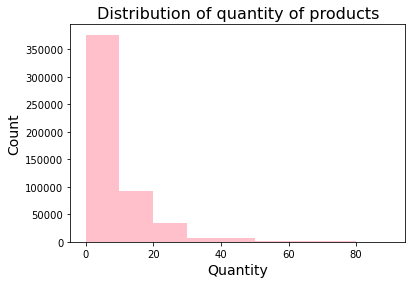

In [192]:
bins = np.arange(0, 100, 10)
plt.hist(data=tx_data, x='Quantity', bins=bins, color='pink')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of quantity of products', fontsize=16);

In most cases customers buy less than 50 items per order, maximum lying between 0 to 10


In [193]:
#dropping null values as we need to predict lifetime value for each customer
tx_data.dropna(subset=['CustomerID'], inplace=True)
tx_data.shape

(406829, 8)

In [194]:
tx_data['CustomerID'].isnull().sum() #checking null values now

0

In [195]:
tx_data.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
381429,569866,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,1,2011-06-10 14:50:00,0.29,12757.0,Portugal
388843,570458,23507,MINI PLAYING CARDS BUFFALO BILL,3,2011-10-10 15:39:00,0.42,14535.0,United Kingdom
345134,567145,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-16 15:09:00,4.15,12921.0,United Kingdom
527699,580727,22086,PAPER CHAIN KIT 50'S CHRISTMAS,18,2011-05-12 17:17:00,5.79,14096.0,United Kingdom
206266,554920,23163,REGENCY SUGAR TONGS,8,2011-05-27 12:41:00,2.49,16275.0,United Kingdom


In [196]:
#seeing various countries included in our dataset

tx_data['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

United Kingdom dominates as it has maximum entries. Thus, we will now perform various operations for united kingdom only.

In [197]:
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)


In [198]:
tx_data.shape
tx_uk.shape

(361878, 8)

creating  a new  user dataframe to keep CustomerID and new segmentation scores

In [199]:
tx_user = pd.DataFrame(tx_data['CustomerID'].unique())
tx_user.columns = ['CustomerID']
tx_user.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


getting max purchase date for each customer and creating a dataframe with it

In [200]:
tx_max_purchase = tx_uk.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-11-17 17:13:00
2,12748.0,2011-12-05 18:58:00
3,12749.0,2011-11-17 12:05:00
4,12820.0,2011-10-26 13:27:00


# recency

In [201]:
tx_max_purchase['MaxPurchaseDate'].max() # 'latest or maximum invoice date' of entire dataset is taken as our observation point

Timestamp('2011-12-10 17:19:00')

In [202]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days 
# calculating recency value of each customer by subtracting their lastest invoice date from max invoice date 

In [203]:
#merging this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')
tx_user.head()

,CustomerID,Recency
0,17850.0,69
1,13047.0,47
2,13748.0,159
3,15100.0,70
4,15291.0,4


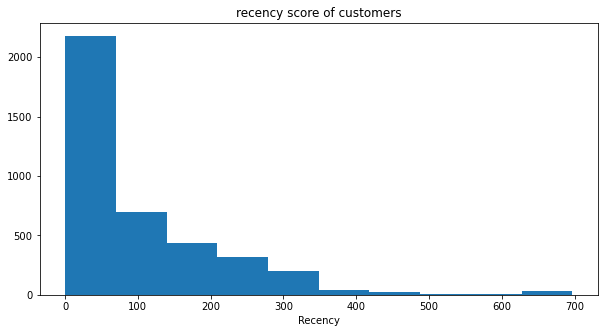

In [204]:


plt.figure(figsize=[10,5])

# plot histogram
plt.hist(tx_user['Recency'])
# add formatting
plt.xlabel("Recency")
plt.title("recency score of customers")
plt.show()

maximum recency values lie between 0 to 80

In [52]:
tx_user.describe()

,CustomerID,Recency
count,3950.000000,3950.000000
mean,15562.029367,101.376709
std,1576.848325,114.006823
min,12346.000000,0.000000
25%,14208.250000,20.000000
50%,15571.500000,57.500000
75%,16913.750000,153.000000
max,18287.000000,697.000000


We see that even though the average is 101 day recency, median is 57.5.

Applying K-means clustering to assign a recency score via Elbow Method below:

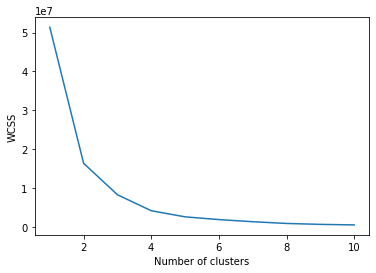

In [104]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tx_recency) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Here it looks like 4 is the optimal number of clusters

In [59]:
#building 4 clusters for recency and adding it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

In [60]:
#function for ordering cluster numbers and assigning them to each Customer in our dataframe tx_user.
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,68.0,591.808824,93.313028,454.0,485.0,638.0,666.0,697.0
1,565.0,277.853097,44.662144,211.0,243.0,269.0,311.0,424.0
2,861.0,143.393728,35.161414,88.0,114.0,142.0,174.0,210.0
3,2456.0,32.469870,24.069517,0.0,12.0,25.0,51.0,87.0


 cluster 3 covers most recent customers whereas 0 has the most inactive ones.

FREQUENCY

To create frequency clusters, we need to find total number of orders for each customer.

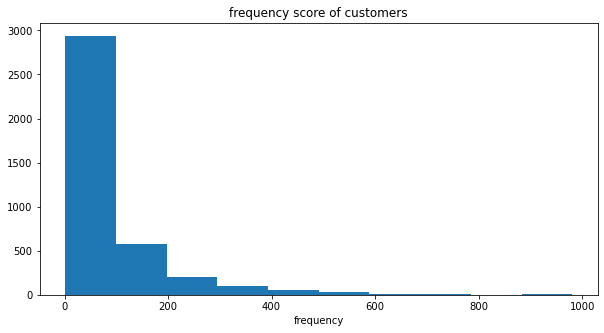

In [62]:
tx_frequency = tx_uk.groupby('CustomerID').InvoiceDate.count().reset_index() #order count of each customer and creating a 
                                                                            #dataframe
tx_frequency.columns = ['CustomerID','Frequency']
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID') #adding to main dataframe


#plotting
plt.figure(figsize=[10,5])

# plot histogram
plt.hist(tx_user.query('Frequency < 1000')['Frequency'])
# add formatting
plt.xlabel("frequency")
plt.title("frequency score of customers")
plt.show()


maximum frequency lies between 0 to 100

In [63]:
tx_user.describe()

,CustomerID,Recency,RecencyCluster,Frequency
count,3950.000000,3950.000000,3950.000000,3950.000000
mean,15562.029367,101.376709,2.444304,91.614684
std,1576.848325,114.006823,0.797763,220.557389
min,12346.000000,0.000000,0.000000,1.000000
25%,14208.250000,20.000000,2.000000,17.000000
50%,15571.500000,57.500000,3.000000,41.000000
75%,16913.750000,153.000000,3.000000,101.000000
max,18287.000000,697.000000,3.000000,7983.000000


We see that even though the average is 91 days frequency, median is 41 days.

In [105]:
#Applying K-means clustering to assign a fequency score via Elbow Method below:



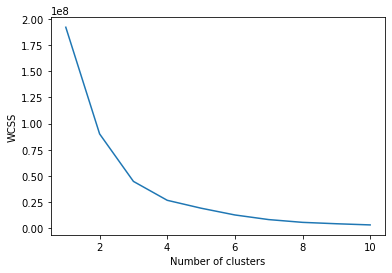

In [102]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tx_frequency) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [106]:
# Assigning clusters to customers
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


#REVENUE

Calculating revenue for each customer and  plotting a histogram and applying the same clustering method.

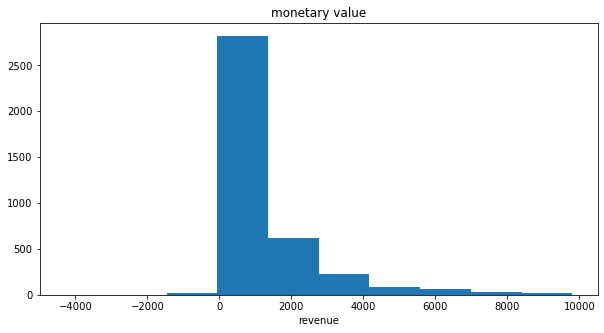

In [109]:
# revenue for each customer
tx_uk['Revenue'] = tx_uk['UnitPrice'] * tx_uk['Quantity']
tx_revenue = tx_uk.groupby('CustomerID').Revenue.sum().reset_index()

#merging it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

#plotting the histogram
plt.figure(figsize=[10,5])

plt.hist(tx_user.query('Revenue < 10000')['Revenue'])
# add formatting
plt.xlabel("revenue")
plt.title("monetary value")
plt.show()

 some customers have negative revenue too. Applying k-means clustering:

Maximum revenue earned is between 0 to 1000

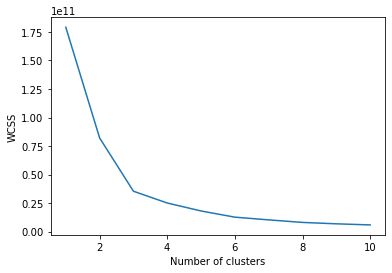

In [110]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tx_revenue) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [128]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


In [129]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue_x,Revenue_y,Revenue,OverallScore,Segment,RevenueCluster
0,17850.0,69,3,312,1,5288.63,5288.63,5288.63,5,High-Value,1
1,14688.0,0,3,359,1,5107.38,5107.38,5107.38,5,High-Value,1
2,13767.0,26,3,399,1,16945.71,16945.71,16945.71,5,High-Value,1
3,15513.0,5,3,314,1,14520.08,14520.08,14520.08,5,High-Value,1
4,14849.0,2,3,392,1,7904.28,7904.28,7904.28,5,High-Value,1


#OVERALL SCORE
We have scores (cluster numbers) for recency, frequency & revenue. Let’s create an overall score out of them:

In [113]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_15012\1331864602.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,591.808824,19.750000,198.370588
1,278.092692,25.262032,351.812478
2,144.509569,39.671053,629.868911
3,36.669363,61.902427,1023.488157
4,24.894081,264.252336,3760.443489
5,16.033557,373.255034,8923.955570
6,13.148148,876.037037,22777.914815
7,13.142857,1272.714286,103954.025714
8,5.333333,5917.666667,42177.930000


The scoring above clearly shows us that customers with score 8 is our best customers whereas 0 is the worst.

To keep things simple,we name these scores:

0 to 2: Low Value

3 to 4: Mid Value

5+: High Value

We can easily apply this naming on our dataframe:

In [118]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [127]:
tx_user.sample(10)

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue_x,Revenue_y,Revenue,RevenueCluster,OverallScore,Segment
1792,16796.0,31,3,18,0,305.62,305.62,305.62,0,3,Mid-Value
2714,12881.0,98,2,7,0,298.00,298.00,298.00,0,2,Low-Value
1102,16573.0,74,3,46,0,648.41,648.41,648.41,0,3,Mid-Value
2149,15286.0,50,3,3,0,240.55,240.55,240.55,0,3,Mid-Value
3576,15397.0,290,1,6,0,94.00,94.00,94.00,0,1,Low-Value
57,14051.0,18,3,215,1,15477.34,15477.34,15477.34,1,5,High-Value
3429,17525.0,360,1,9,0,422.70,422.70,422.70,0,1,Low-Value
157,15093.0,19,3,112,0,4410.14,4410.14,4410.14,1,4,Mid-Value
1597,13761.0,51,3,70,0,1070.65,1070.65,1070.65,0,3,Mid-Value
1660,15467.0,10,3,53,0,511.88,511.88,511.88,0,3,Mid-Value


The main strategies that can be undertaken are quite clear:

High Value: Improve Retention

Mid Value: Improve Retention + Increase Frequency (customers can be pushed to buy more)

Low Value: Increase Frequency

Based on the data analysis, we can make strategies and take decisions about how much money to invest in acquiring new customers and retaining existing ones.